In [1]:
#imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np


In [2]:
#load the data

raw_data = pd.read_csv(r'C:\Users\leann\OneDrive\Desktop\SPRINGBOARD\capstone 2\breast_cancer_data\METABRIC_RNA_Mutation.csv')

C:\Users\leann\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3185: DtypeWarning: Columns (678,688,690,692) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
raw_data.info

<bound method DataFrame.info of       patient_id  age_at_diagnosis type_of_breast_surgery    cancer_type  \
0              0             75.65             MASTECTOMY  Breast Cancer   
1              2             43.19      BREAST CONSERVING  Breast Cancer   
2              5             48.87             MASTECTOMY  Breast Cancer   
3              6             47.68             MASTECTOMY  Breast Cancer   
4              8             76.97             MASTECTOMY  Breast Cancer   
...          ...               ...                    ...            ...   
1899        7295             43.10      BREAST CONSERVING  Breast Cancer   
1900        7296             42.88             MASTECTOMY  Breast Cancer   
1901        7297             62.90             MASTECTOMY  Breast Cancer   
1902        7298             61.16             MASTECTOMY  Breast Cancer   
1903        7299             60.02      BREAST CONSERVING  Breast Cancer   

                           cancer_type_detailed cellula

In [4]:
raw_data.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [5]:
raw_data.columns

Index(['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery',
       'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy',
       'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc',
       ...
       'mtap_mut', 'ppp2cb_mut', 'smarcd1_mut', 'nras_mut', 'ndfip1_mut',
       'hras_mut', 'prps2_mut', 'smarcb1_mut', 'stmn2_mut', 'siah1_mut'],
      dtype='object', length=693)

In [6]:
#check for missing data.
missing = pd.concat([raw_data.isnull().sum(),100*raw_data.isnull().mean()], axis=1)
missing.columns=['Count', '%']
missing = missing.sort_values(by='Count',ascending=False)
missing.head(30)

,Count,%
tumor_stage,501,26.313025
3-gene_classifier_subtype,204,10.714286
primary_tumor_laterality,106,5.567227
neoplasm_histologic_grade,72,3.781513
cellularity,54,2.836134
mutation_count,45,2.363445
er_status_measured_by_ihc,30,1.575630
type_of_breast_surgery,22,1.155462
tumor_size,20,1.050420
cancer_type_detailed,15,0.787815


It looks like tumor_stage is missing from 26% of patients, 3-gene_classifier_subtype from 12% of patients, primary_tumor_laterality from 6% of patients. 

One is missing data from the death_from_cancer column, and as that is probably the most important column we'll probably want to cut that. 

I should look at all the data that is missing.

In [7]:
# Next look at non-numeric columns. 

raw_data.select_dtypes('object')

,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,pam50_+_claudin-low_subtype,er_status_measured_by_ihc,er_status,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,claudin-low,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0
1,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumA,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0
2,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumB,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0
3,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,LumB,Positve,Positive,NEUTRAL,Negative,Mixed,...,0,0,0,0,0,0,0,0,0,0
4,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,LumB,Positve,Positive,NEUTRAL,Negative,Mixed,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,BREAST CONSERVING,Breast Cancer,Breast Invasive Lobular Carcinoma,High,LumA,Positve,Positive,NEUTRAL,Negative,Lobular,...,0,0,0,0,0,0,0,0,0,0
1900,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumB,Positve,Positive,GAIN,Positive,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0
1901,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumB,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0
1902,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,LumB,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#I want to get index and column nme for all my columns

column_names=pd.DataFrame(columns=['index_number', 'column_name'])

for i, col in enumerate(raw_data.columns):
   column_names = column_names.append({'column_name': col, 'index_number': i}, ignore_index=True)

column_names.set_index('index_number', inplace=True)
column_names.head(100)


,column_name
index_number,
0,patient_id
1,age_at_diagnosis
2,type_of_breast_surgery
3,cancer_type
4,cancer_type_detailed
...,...
95,cul1
96,dll1
97,dll3


I see that columns 0:30 are clinical attributes, and from 31 on it is genetic data. I know that part of that is z scores and part of that is mutations. I think I need to divide this into 3 different data sets, and keep the patient ID as the constant in all of them. 



In [9]:
#I want to find datatype of the Z score data -it is float64. 
raw_data['cul1'].describe()

count    1.904000e+03
mean     6.302521e-07
std      1.000262e+00
min     -3.179400e+00
25%     -6.318000e-01
50%     -6.660000e-02
75%      4.961000e-01
max      5.621200e+00
Name: cul1, dtype: float64

In [10]:
#make dataframe of only Z score data. I can see that it included clinical data but not patient IDs. Need to fix this. 

z_scores= raw_data.select_dtypes(include=['float64'])
print('z_score info: ',z_scores.info())

z_scores.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 498 entries, age_at_diagnosis to ugt2b7
dtypes: float64(498)
memory usage: 7.2 MB
z_score info:  None


,age_at_diagnosis,cohort,neoplasm_histologic_grade,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,tumor_size,tumor_stage,brca1,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
0,75.65,1.0,3.0,10.0,NaN,6.044,140.500000,22.0,2.0,-1.3990,...,-1.1877,-0.0194,-1.6345,-0.2142,-0.5698,-1.1741,-1.4779,-0.5954,-0.8847,-0.3354
1,43.19,1.0,3.0,0.0,2.0,4.020,84.633333,10.0,1.0,-1.3800,...,-0.4412,0.4534,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,-0.8920
2,48.87,1.0,2.0,1.0,2.0,4.030,163.700000,15.0,2.0,0.0670,...,-0.5381,0.0668,0.8344,1.7227,0.4024,-3.7172,-1.5538,1.3701,-0.1078,0.3655
3,47.68,1.0,2.0,3.0,1.0,4.050,164.933333,25.0,2.0,0.6744,...,-0.5630,-0.7078,0.8228,0.6819,-0.1948,-2.3286,-0.9924,-0.3154,0.2320,-0.4828
4,76.97,1.0,3.0,8.0,2.0,6.080,41.366667,40.0,2.0,1.2932,...,-0.5845,-0.3544,-1.0150,2.2961,0.1817,-0.1572,0.0427,5.0048,3.8476,1.3223


GETTING MY Z SCORE DATAFRAM (z_scores):

In [11]:
# dropping the clinical data, and starting with z-scores. 
z_scores = z_scores.drop(z_scores.loc[: , : 'tumor_stage'], axis = 1)
z_scores.head()

#add back in patient_id from raw_data:
z_scores=z_scores.join(raw_data['patient_id'],how='left')

#put it at the beginning of the DF, moving it from the end:
z_scores.insert(0, 'patient_id', z_scores.pop('patient_id'))
z_scores.head()


,patient_id,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
0,0,-1.3990,-0.5738,-1.6217,1.4524,0.3504,1.1517,0.0348,0.1266,-0.8361,...,-1.1877,-0.0194,-1.6345,-0.2142,-0.5698,-1.1741,-1.4779,-0.5954,-0.8847,-0.3354
1,2,-1.3800,0.2777,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,...,-0.4412,0.4534,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,-0.8920
2,5,0.0670,-0.8426,0.2114,-0.3326,0.5141,-0.0803,1.1398,0.4187,-0.4030,...,-0.5381,0.0668,0.8344,1.7227,0.4024,-3.7172,-1.5538,1.3701,-0.1078,0.3655
3,6,0.6744,-0.5428,-1.6592,0.6369,1.6708,-0.8880,1.2491,-1.1889,-0.4174,...,-0.5630,-0.7078,0.8228,0.6819,-0.1948,-2.3286,-0.9924,-0.3154,0.2320,-0.4828
4,8,1.2932,-0.9039,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,...,-0.5845,-0.3544,-1.0150,2.2961,0.1817,-0.1572,0.0427,5.0048,3.8476,1.3223


GET PATIENT CLINICAL ATTRIBUTES DATAFRAME (clinical_data):

In [12]:
clinical_data = raw_data.loc[: , :'tumor_stage']
clinical_data.head(50)

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mutation_count,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,NaN,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,2.0,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,2.0,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,1.0,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,2.0,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0
5,10,78.77,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1.0,Positve,...,4.0,4.062,IDC,7.800000,0,Positive,1,ER+/HER2- High Prolif,31.0,4.0
6,14,56.45,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,1,LumB,1.0,Positve,...,4.0,4.020,IDC,164.333333,1,Positive,1,NaN,10.0,2.0
7,22,89.08,BREAST CONSERVING,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,0,claudin-low,1.0,Positve,...,1.0,4.058,MDLC,99.533333,0,Negative,1,NaN,29.0,2.0
8,28,86.41,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1.0,Positve,...,4.0,5.032,IDC,36.566667,0,Negative,1,ER+/HER2- High Prolif,16.0,2.0
9,35,84.22,MASTECTOMY,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,Her2,1.0,Negative,...,5.0,3.056,ILC,36.266667,0,Negative,0,ER+/HER2- High Prolif,28.0,2.0


GET GENE EXPRESSION DATAFRAME (genes):

In [13]:
genes = raw_data.drop(raw_data.loc[: , : 'ugt2b7'], axis = 1)
genes.head()

#add back in patient_id like above
genes=genes.join(raw_data['patient_id'],how='left')

#put it at the beginning of the DF, moving it from the end:
genes.insert(0, 'patient_id', genes.pop('patient_id'))
genes.head()



,patient_id,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,H178P,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,H1047R,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,E542K,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,S241F,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#let's look at the data in the clinical attributes. 

for col in clinical_data:
    print(col)
    
    
#look at missing data here
missing_clinical = pd.concat([clinical_data.isnull().sum(),100*clinical_data.isnull().mean()], axis=1)
missing_clinical.columns=['Count', '%']
missing_clinical = missing.sort_values(by='Count',ascending=False)
missing_clinical.head(13)

#I'M CONFUSED... there is no 'death_from_cancer' column. 

patient_id
age_at_diagnosis
type_of_breast_surgery
cancer_type
cancer_type_detailed
cellularity
chemotherapy
pam50_+_claudin-low_subtype
cohort
er_status_measured_by_ihc
er_status
neoplasm_histologic_grade
her2_status_measured_by_snp6
her2_status
tumor_other_histologic_subtype
hormone_therapy
inferred_menopausal_state
integrative_cluster
primary_tumor_laterality
lymph_nodes_examined_positive
mutation_count
nottingham_prognostic_index
oncotree_code
overall_survival_months
overall_survival
pr_status
radio_therapy
3-gene_classifier_subtype
tumor_size
tumor_stage


,Count,%
tumor_stage,501,26.313025
3-gene_classifier_subtype,204,10.714286
primary_tumor_laterality,106,5.567227
neoplasm_histologic_grade,72,3.781513
cellularity,54,2.836134
mutation_count,45,2.363445
er_status_measured_by_ihc,30,1.575630
type_of_breast_surgery,22,1.155462
tumor_size,20,1.050420
oncotree_code,15,0.787815


In [15]:
#looking at datatypes for my clinical data to see if I need to convert any of them. 
print(clinical_data.dtypes)

#want to see our data again
clinical_data.head()

patient_id                          int64
age_at_diagnosis                  float64
type_of_breast_surgery             object
cancer_type                        object
cancer_type_detailed               object
cellularity                        object
chemotherapy                        int64
pam50_+_claudin-low_subtype        object
cohort                            float64
er_status_measured_by_ihc          object
er_status                          object
neoplasm_histologic_grade         float64
her2_status_measured_by_snp6       object
her2_status                        object
tumor_other_histologic_subtype     object
hormone_therapy                     int64
inferred_menopausal_state          object
integrative_cluster                object
primary_tumor_laterality           object
lymph_nodes_examined_positive     float64
mutation_count                    float64
nottingham_prognostic_index       float64
oncotree_code                      object
overall_survival_months           

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mutation_count,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,NaN,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,2.0,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,2.0,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,1.0,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,2.0,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0


In [16]:
#gonna try to do this in a loop

for col in clinical_data:
    print('\n',col, ': ', clinical_data[col].unique())


 patient_id :  [   0    2    5 ... 7297 7298 7299]

 age_at_diagnosis :  [75.65 43.19 48.87 ... 43.1  42.88 60.02]

 type_of_breast_surgery :  ['MASTECTOMY' 'BREAST CONSERVING' nan]

 cancer_type :  ['Breast Cancer' 'Breast Sarcoma']

 cancer_type_detailed :  ['Breast Invasive Ductal Carcinoma'
 'Breast Mixed Ductal and Lobular Carcinoma'
 'Breast Invasive Lobular Carcinoma'
 'Breast Invasive Mixed Mucinous Carcinoma' 'Breast' nan
 'Metaplastic Breast Cancer']

 cellularity :  [nan 'High' 'Moderate' 'Low']

 chemotherapy :  [0 1]

 pam50_+_claudin-low_subtype :  ['claudin-low' 'LumA' 'LumB' 'Her2' 'Normal' 'Basal' 'NC']

 cohort :  [1. 2. 3. 5. 4.]

 er_status_measured_by_ihc :  ['Positve' 'Negative' nan]

 er_status :  ['Positive' 'Negative']

 neoplasm_histologic_grade :  [ 3.  2.  1. nan]

 her2_status_measured_by_snp6 :  ['NEUTRAL' 'LOSS' 'GAIN' 'UNDEF']

 her2_status :  ['Negative' 'Positive']

 tumor_other_histologic_subtype :  ['Ductal/NST' 'Mixed' 'Lobular' 'Tubular/ cribrifor

columns that should NOT become categorical:
 age_at_diagnosis 
 lymph_nodes_examined_positive
 integrative_cluster
 mutation_count
 nottingham_prognostic_index
 overall_survival_months
 tumor_size
 
 Want to write a loop that converts everything else to a category

In [17]:
not_cat = clinical_data[['age_at_diagnosis', 'lymph_nodes_examined_positive','integrative_cluster','mutation_count','nottingham_prognostic_index', 'overall_survival_months', 'tumor_size']]
not_cat.head()

for col in clinical_data.columns:
    if col not in not_cat.columns:
        clinical_data[col]=clinical_data[col].astype('category')
print(clinical_data.dtypes)

patient_id                        category
age_at_diagnosis                   float64
type_of_breast_surgery            category
cancer_type                       category
cancer_type_detailed              category
cellularity                       category
chemotherapy                      category
pam50_+_claudin-low_subtype       category
cohort                            category
er_status_measured_by_ihc         category
er_status                         category
neoplasm_histologic_grade         category
her2_status_measured_by_snp6      category
her2_status                       category
tumor_other_histologic_subtype    category
hormone_therapy                   category
inferred_menopausal_state         category
integrative_cluster                 object
primary_tumor_laterality          category
lymph_nodes_examined_positive      float64
mutation_count                     float64
nottingham_prognostic_index        float64
oncotree_code                     category
overall_sur

In [18]:
# FIXING OTHER THINGS

#I think age can be rounded to the year, as an int64
clinical_data['age_at_diagnosis']=clinical_data['age_at_diagnosis'].astype('int64')


#the word 'positive' was spelled incorrectly...fixing
clinical_data['er_status_measured_by_ihc'] = clinical_data['er_status_measured_by_ihc'].replace('Positve','Positive')

# wanted to remove the decimal for cohort
clinical_data['cohort']=clinical_data['cohort'].astype('int64')
clinical_data['cohort']=clinical_data['cohort'].astype('category')


#this should be int 
clinical_data['lymph_nodes_examined_positive']=clinical_data['lymph_nodes_examined_positive'].astype('int64')

#couldn't convert to integer for mutation_count because of the nans... going to replace those with a '0'
clinical_data['mutation_count'] = clinical_data['mutation_count'].fillna(0).astype('int64')


# for  overall_survival_months there are too many decimal places. I think we are ok with just 1. 
clinical_data['overall_survival_months']=clinical_data['overall_survival_months'].round(1)



In [19]:
clinical_data.dtypes

patient_id                        category
age_at_diagnosis                     int64
type_of_breast_surgery            category
cancer_type                       category
cancer_type_detailed              category
cellularity                       category
chemotherapy                      category
pam50_+_claudin-low_subtype       category
cohort                            category
er_status_measured_by_ihc         category
er_status                         category
neoplasm_histologic_grade         category
her2_status_measured_by_snp6      category
her2_status                       category
tumor_other_histologic_subtype    category
hormone_therapy                   category
inferred_menopausal_state         category
integrative_cluster                 object
primary_tumor_laterality          category
lymph_nodes_examined_positive        int64
mutation_count                       int64
nottingham_prognostic_index        float64
oncotree_code                     category
overall_sur

In [20]:
# SHOULD FIGURE OUT MISSINGNESS STUFF 

### Z SCORES CLEANING

In [21]:
# looking at data types. I don't need to fix anything here. 
z_scores.dtypes

patient_id      int64
brca1         float64
brca2         float64
palb2         float64
pten          float64
               ...   
tnk2          float64
tulp4         float64
ugt2b15       float64
ugt2b17       float64
ugt2b7        float64
Length: 490, dtype: object

In [22]:
z_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 490 entries, patient_id to ugt2b7
dtypes: float64(489), int64(1)
memory usage: 7.1 MB


In [23]:
z_scores.describe()

,patient_id,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
count,1904.000000,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1904.000000,1.904000e+03,1.904000e+03,...,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1904.000000,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03
mean,3921.982143,-6.302521e-07,-4.201681e-07,3.676471e-07,-8.928571e-07,6.302521e-07,-2.100840e-07,0.000002,-1.175530e-16,-3.676471e-07,...,4.726891e-07,-3.676471e-07,-9.453782e-07,-1.050420e-07,-0.000002,3.676471e-07,4.726891e-07,7.878151e-07,-1.256581e-17,-1.953386e-18
std,2358.478332,1.000262e+00,1.000262e+00,1.000263e+00,1.000263e+00,1.000263e+00,1.000262e+00,1.000263,1.000262e+00,1.000263e+00,...,1.000263e+00,1.000262e+00,1.000262e+00,1.000263e+00,1.000262,1.000264e+00,1.000262e+00,1.000263e+00,1.000262e+00,1.000262e+00
min,0.000000,-2.444400e+00,-2.783500e+00,-4.384600e+00,-5.932800e+00,-2.481200e+00,-3.170500e+00,-3.323700,-2.688700e+00,-3.689800e+00,...,-2.120800e+00,-3.364800e+00,-2.719400e+00,-4.982700e+00,-2.981700,-3.833300e+00,-3.609300e+00,-1.166900e+00,-2.112600e+00,-1.051600e+00
25%,896.500000,-7.198500e-01,-6.994750e-01,-6.798250e-01,-5.586500e-01,-6.661500e-01,-6.602250e-01,-0.458600,-7.385500e-01,-6.667750e-01,...,-6.188500e-01,-6.104750e-01,-6.741750e-01,-6.136750e-01,-0.632900,-6.664750e-01,-7.102000e-01,-5.058250e-01,-4.762000e-01,-7.260000e-01
50%,4730.500000,-1.244500e-01,-5.820000e-02,-2.210000e-02,1.098500e-01,-3.010000e-02,-4.200000e-03,0.115550,-1.311000e-01,-1.445000e-02,...,-2.456500e-01,-4.690000e-02,-1.422500e-01,-5.175000e-02,-0.026650,7.000000e-04,-2.980000e-02,-2.885500e-01,-1.334000e-01,-4.248000e-01
75%,5536.250000,5.532250e-01,6.290000e-01,6.400000e-01,6.426250e-01,6.447500e-01,6.901500e-01,0.649800,5.431250e-01,6.387250e-01,...,3.306000e-01,5.144500e-01,5.146000e-01,5.787750e-01,0.590350,6.429000e-01,5.957250e-01,6.022500e-02,2.703750e-01,4.284000e-01
max,7299.000000,4.554200e+00,3.737900e+00,4.615000e+00,3.254100e+00,4.289800e+00,3.824200e+00,2.820900,4.538200e+00,5.371300e+00,...,6.534900e+00,1.027030e+01,6.329000e+00,4.571300e+00,12.742300,3.938800e+00,3.833400e+00,1.088490e+01,1.264390e+01,3.284400e+00


In [24]:
# ALSO NEED TO FIND MISSINGNESS 

### GENE EXPRESSIONS CLEANING

In [25]:
#this is fine as far as datatypes go

genes.dtypes


patient_id      int64
pik3ca_mut     object
tp53_mut       object
muc16_mut      object
ahnak2_mut     object
                ...  
hras_mut       object
prps2_mut      object
smarcb1_mut    object
stmn2_mut      object
siah1_mut      object
Length: 174, dtype: object

In [26]:
genes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 174 entries, patient_id to siah1_mut
dtypes: int64(1), object(173)
memory usage: 2.5+ MB


In [27]:
#check for duplicates in our dataframes. Looks like none is duplicated, which is good. 
print('genes: ',genes.duplicated().sum())
print('z_scores: ', z_scores.duplicated().sum())
print('clinical_data: ', clinical_data.duplicated().sum())

genes:  0
z_scores:  0
clinical_data:  0


In [28]:
#looking at survival rates - 0 = died, 1 = lived. This is the most important one

survival_counts = clinical_data['overall_survival'].value_counts()
print('survival rates:\n',survival_counts)

survival rates:
 0    1103
1     801
Name: overall_survival, dtype: int64


In [29]:
#but let's look at all of our data - for some reason it's showing all data types here, but good to be able to see it all. 
for col in clinical_data:
    if clinical_data[col].dtype == 'category':
        counts = clinical_data[col].value_counts()
        print('\n',counts)
    else:
        pass
    



 0       1
5281    1
5299    1
5298    1
5296    1
       ..
3037    1
3035    1
3033    1
3032    1
7299    1
Name: patient_id, Length: 1904, dtype: int64

 MASTECTOMY           1127
BREAST CONSERVING     755
Name: type_of_breast_surgery, dtype: int64

 Breast Cancer     1903
Breast Sarcoma       1
Name: cancer_type, dtype: int64

 Breast Invasive Ductal Carcinoma             1500
Breast Mixed Ductal and Lobular Carcinoma     207
Breast Invasive Lobular Carcinoma             142
Breast Invasive Mixed Mucinous Carcinoma       22
Breast                                         17
Metaplastic Breast Cancer                       1
Name: cancer_type_detailed, dtype: int64

 High        939
Moderate    711
Low         200
Name: cellularity, dtype: int64

 0    1508
1     396
Name: chemotherapy, dtype: int64

 LumA           679
LumB           461
Her2           220
Basal          199
claudin-low    199
Normal         140
NC               6
Name: pam50_+_claudin-low_subtype, dtype: int64

 3

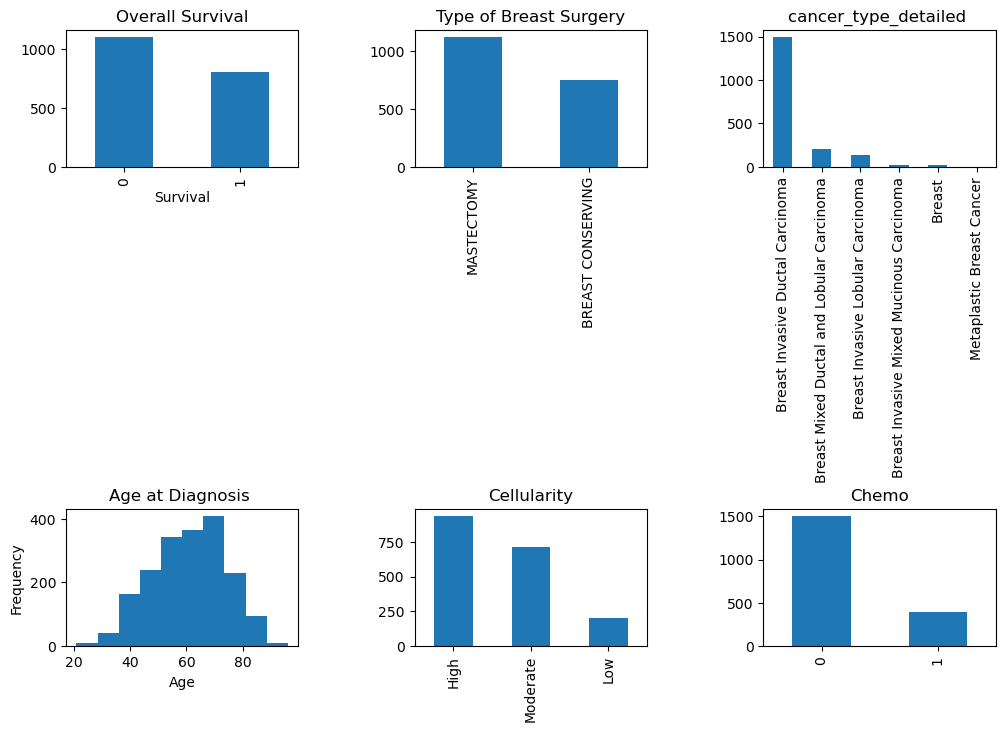

In [30]:
# I WANT TO LOOK AT MY CLINICAL DATA - plotting all of them that make sense to plot. 

fig, ax = plt.subplots(2,3, figsize=(12,8))
clinical_data.overall_survival.value_counts().plot(kind='bar', ax=ax[0,0])
ax[0,0].set_title('Overall Survival')
ax[0,0].set_xlabel('Survival')

clinical_data.type_of_breast_surgery.value_counts().plot(kind='bar', ax=ax[0,1])
ax[0,1].set_title('Type of Breast Surgery')

clinical_data.cancer_type_detailed.value_counts().plot(kind='bar', ax=ax[0,2])
ax[0,2].set_title('cancer_type_detailed ')

clinical_data.age_at_diagnosis.plot(kind='hist', ax=ax[1,0])
ax[1,0].set_title('Age at Diagnosis ')
ax[1,0].set_xlabel('Age')


clinical_data.cellularity.value_counts().plot(kind='bar', ax=ax[1,1])
ax[1,1].set_title('Cellularity')

clinical_data.chemotherapy.value_counts().plot(kind='bar', ax=ax[1,2])
ax[1,2].set_title('Chemo')

plt.subplots_adjust(wspace=0.5, hspace=2.5);


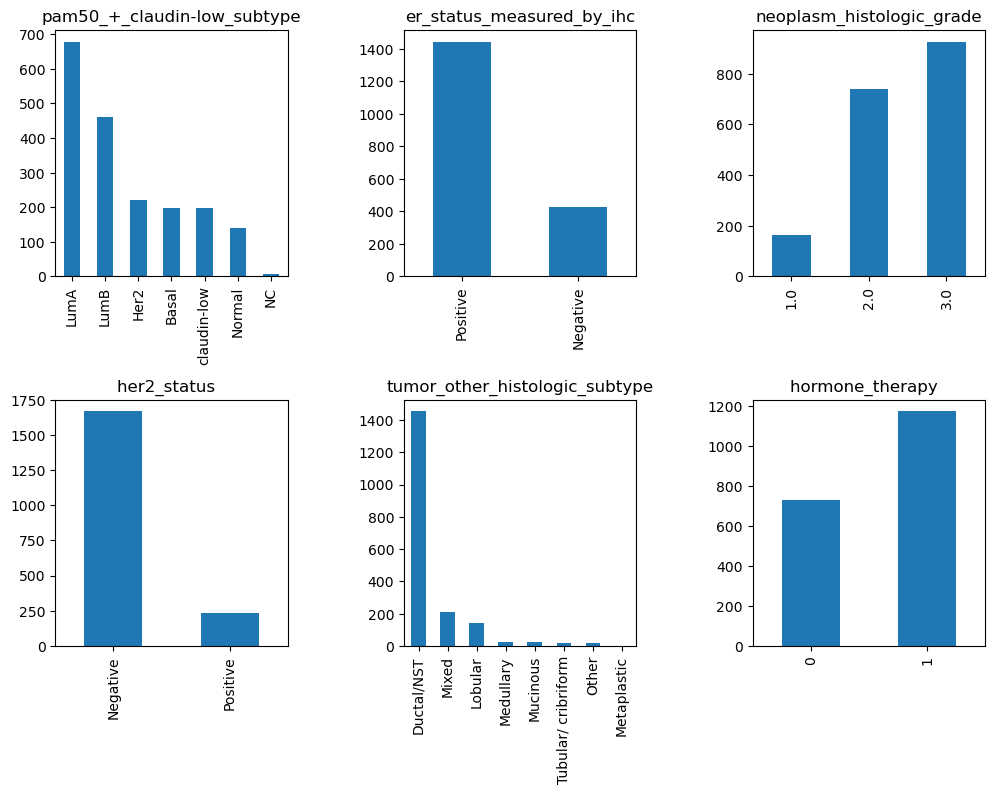

In [31]:

fig, ax = plt.subplots(2,3, figsize=(12,8))
clinical_data['pam50_+_claudin-low_subtype'].value_counts().plot(kind='bar', ax=ax[0,0])
ax[0,0].set_title('pam50_+_claudin-low_subtype')

clinical_data.er_status_measured_by_ihc.value_counts().plot(kind='bar', ax=ax[0,1])
ax[0,1].set_title('er_status_measured_by_ihc')

clinical_data.neoplasm_histologic_grade.value_counts().plot(kind='bar', ax=ax[0,2])
ax[0,2].set_title('neoplasm_histologic_grade')

clinical_data.her2_status.value_counts().plot(kind='bar', ax=ax[1,0])
ax[1,0].set_title('her2_status  ')

clinical_data.tumor_other_histologic_subtype  .value_counts().plot(kind='bar', ax=ax[1,1])
ax[1,1].set_title('tumor_other_histologic_subtype')

clinical_data.hormone_therapy  .value_counts().plot(kind='bar', ax=ax[1,2])
ax[1,2].set_title('hormone_therapy  ')

plt.subplots_adjust(wspace=0.5, hspace=.5);

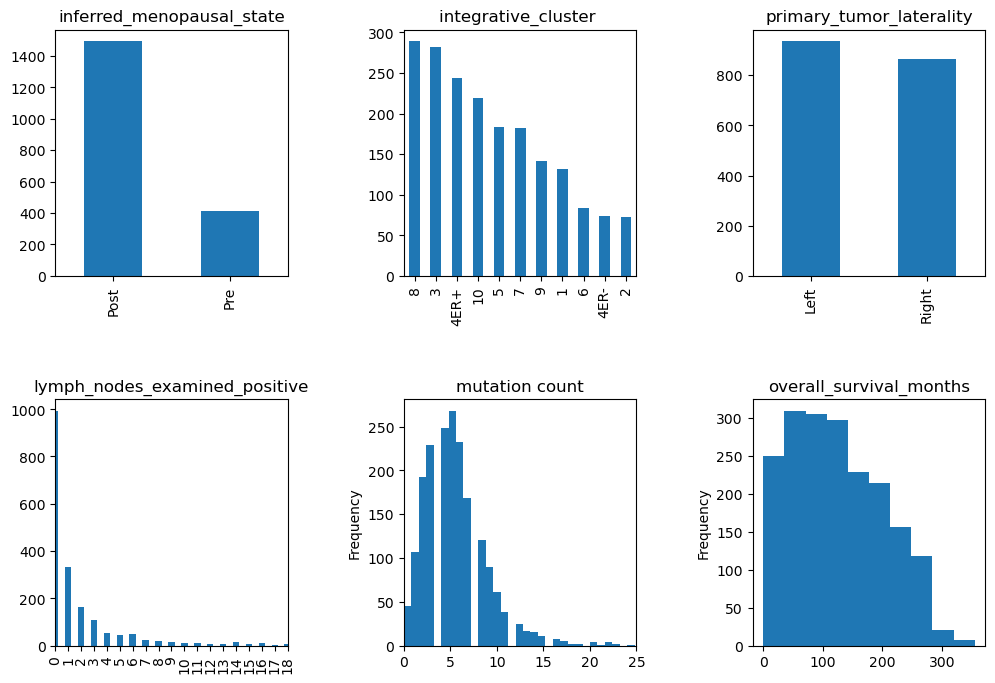

In [32]:

fig, ax = plt.subplots(2,3, figsize=(12,8))
clinical_data['inferred_menopausal_state'].value_counts().plot(kind='bar', ax=ax[0,0])
ax[0,0].set_title('inferred_menopausal_state')

clinical_data.integrative_cluster.value_counts().plot(kind='bar', ax=ax[0,1])
ax[0,1].set_title('integrative_cluster ')

clinical_data.primary_tumor_laterality.value_counts().plot(kind='bar', ax=ax[0,2])
ax[0,2].set_title('primary_tumor_laterality')

clinical_data.lymph_nodes_examined_positive.value_counts().plot(kind='bar', ax=ax[1,0])
ax[1,0].set_title('lymph_nodes_examined_positive')
ax[1,0].set_xlim(0, 18)

clinical_data.mutation_count.plot(kind='hist',bins=100, ax=ax[1,1])
ax[1,1].set_title('mutation count')
ax[1,1].set_xlim(0, 25)

clinical_data.overall_survival_months.plot(kind='hist', ax=ax[1,2])
ax[1,2].set_title('overall_survival_months')

plt.subplots_adjust(wspace=0.5, hspace=.5);

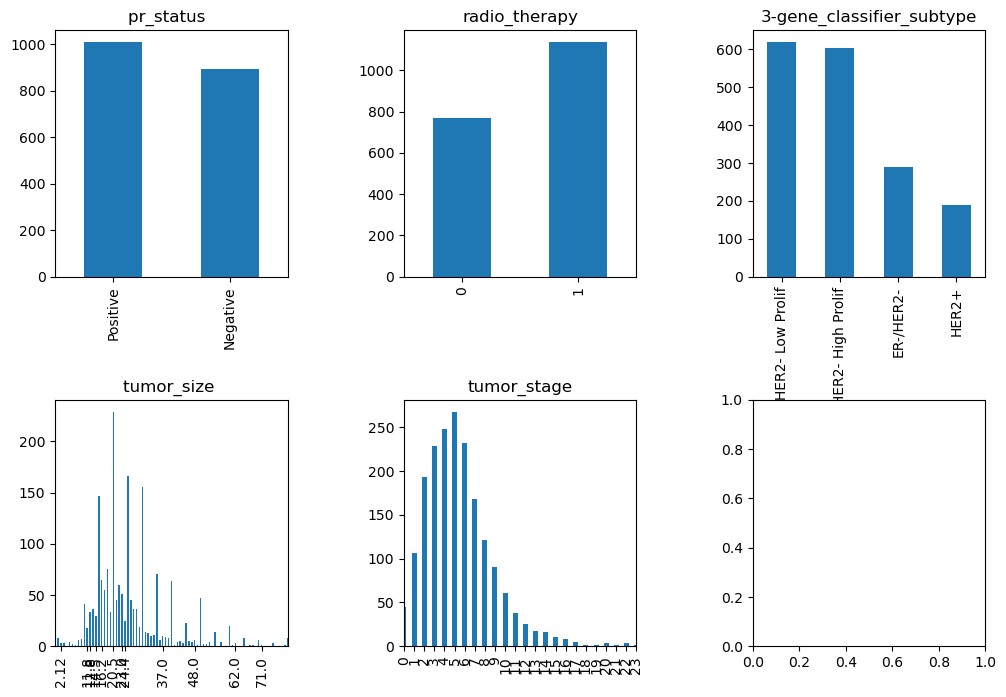

In [33]:

fig, ax = plt.subplots(2,3, figsize=(12,8))
clinical_data['pr_status'].value_counts().plot(kind='bar', ax=ax[0,0])
ax[0,0].set_title('pr_status  ')

clinical_data.radio_therapy.value_counts().plot(kind='bar', ax=ax[0,1])
ax[0,1].set_title('radio_therapy')

clinical_data['3-gene_classifier_subtype'].value_counts().plot(kind='bar', ax=ax[0,2])
ax[0,2].set_title('3-gene_classifier_subtype')

clinical_data.tumor_size.value_counts().plot(kind='bar', ax=ax[1,0])
ax[1,0].set_title('tumor_size ')
ax[1,0].set_xlim(0, 80)
# Set the x-axis tick frequency to 2
ax[1,0].set_xticks(ax[1,0].get_xticks()[::10])

clinical_data.mutation_count.value_counts().plot(kind='bar', ax=ax[1,1])
ax[1,1].set_title('tumor_stage')
ax[1,1].set_xlim(0, 23)

plt.subplots_adjust(wspace=0.5, hspace=.5);

In [34]:
#TAKEAWAYS 

#The proportions for death and getting a mastectomy are similar - I'm guessing that the patients to had breast conserving
#surgery had less severe disease and therefore were more likely to survive. 
# cancer type - the vast majority of cases were invasive ductal carcinoma
# age follows a rougly normal distribution, peaking around age 70. Most women were post menopausal, which makes sense 
#given the age distribution.
#most patients did got get chemo, but did get radiotherapy and hormone therapy. The proportions with death and getting 
#radiotherapy are roughly the same, and again I wonder if this is because more severe disease was present. 
#her2 status for most patients was negative, er status mostly positive
#most neoplasms were grade 3
#mutation counts peaked at 7
#positive lymph nodes looks to fall roughly exponentially
# left and right sides are about equal - I think we can take this out because I dont think it is relavent to survival
#maximum survival time - I'm not sure how to read this. I know data was collected for 351 months. Does this track how many
#people died at a given amount of time?
#tumor stage and tumor size have similar distributions (both left skewed), and I'm guessing they are usually similar
#pr status roughly equal, but a little more positive. 

#IDEA - it looks like we are missing a lot of tumor stage data, but hardly any tumor size. As it looks like they follow 
#a similar distribution, maybe we don't need the stage data. How can I figure out if they are similar enough?